# Минипроект
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
Какой клиент совершил больше всего успешных операций? (success == True)
С какой платформы осуществляется наибольшее количество успешных операций?
Какую платформу предпочитают премиумные клиенты?
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
Постройте график распределения числа успешных операций
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
Описание данных
user_data:

client – идентификатор пользователя
premium – является ли клиент премиум
age – возраст
logs:

client – идентификатор пользователя
success – результат (успех - 1, нет - 0)
platform – платформа
time – время в формате Unix

In [ ]:
# Задание
# Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
# Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

# Вопрос: Сколько уникальных значений принимает переменная platform?

In [18]:
import pandas as pd
path_to_file_1 = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/shared/homeworks/python_ds_miniprojects/3/user_data.csv"
path_to_file_2 = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/shared/homeworks/python_ds_miniprojects/3/logs.csv"
user_data = pd.read_csv(path_to_file_1 , sep = ',')
logs = pd.read_csv(path_to_file_2 , sep = ',')

In [36]:
user_data.head()


,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [33]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [20]:
user_data.columns

Index(['client', 'premium', 'age'], dtype='object')

In [21]:
user_data.shape

(2954, 3)

In [22]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [37]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [38]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [40]:
logs.columns

Index(['client', 'success', 'platform', 'time'], dtype='object')

In [25]:
logs.shape

(4500, 4)

In [26]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [27]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [28]:
logs.platform.describe()

count      4500
unique        3
top       phone
freq       2753
Name: platform, dtype: object

In [29]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [ ]:
# двумя методами определил ответ = 3

In [ ]:
# Задача 2
# Какой клиент совершил больше всего успешных операций?

# Если несколько пользователей совершили одинаковое число успешных действий, 
# перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:
# 12, 123, 456


In [177]:
success_true = logs.query("success == True").groupby('client' )\
.agg({'success' : 'count'})\
.reset_index()\
.sort_values('success')

In [178]:
success_true

,client,success
0,40,1
1882,65936,1
1883,66064,1
1884,66245,1
1885,66266,1
...,...,...
810,28719,41
1487,52870,41
1020,36165,41
2626,92584,41


In [179]:
success_true_max = success_true.success.max()

In [180]:
success_true_max

41

In [181]:
success_true_client = success_True.query('success == 41').sort_values('client')

In [186]:
success_true_client


,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


In [ ]:
# 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584

In [ ]:
# ХЗ будем посмотреть дальше как список выдернуть не  в ручную


In [ ]:
# Задача 3
# С какой платформы осуществляется наибольшее количество успешных операций?

In [196]:
platform_true = logs.query("success == True").groupby('platform', as_index = False )\
.agg({'success' : 'count'})\
.sort_values('success')

In [197]:
platform_true

,platform,success
2,tablet,180
0,computer,1090
1,phone,2019


In [198]:
platform_true.success.max()

2019

In [ ]:
# Задача 4
# Какая платформа наиболее популярна среди премиумных клиентов?


In [200]:
logs_user_data =logs.merge(user_data, on='client', how='inner')

In [201]:
logs_user_data

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [210]:
logs_user_data.query('premium').groupby('platform').agg({'platform' : 'count'}).platform.sort_values()

platform
tablet       24
computer    150
phone       246
Name: platform, dtype: int64

In [212]:
logs_user_data.query('premium').value_counts('platform')

platform
phone       246
computer    150
tablet       24
dtype: int64

In [ ]:
#  Опять тоже самое двумя путями

In [ ]:
# Задача 5
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум), 
# используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

# Используйте датасет, который вы получили на предыдущем шаге

In [216]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [225]:
logs_user_premium = logs_user_data.query('premium')

In [230]:
logs_user_no_premium = logs_user_data.query('premium == False')

In [227]:
logs_user_premium

,client,success,platform,time,premium,age
42,35604,False,phone,1585459894,True,65
49,11983,True,phone,1585459511,True,68
52,99308,True,computer,1585409409,True,38
59,49625,False,phone,1585447789,True,65
64,53978,True,computer,1585408637,True,46
...,...,...,...,...,...,...
3376,20278,True,computer,1585456706,True,65
3399,78455,True,phone,1585459854,True,23
3401,57026,True,computer,1585438120,True,62
3418,2864,True,phone,1585459818,True,41


In [231]:
logs_user_no_premium

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


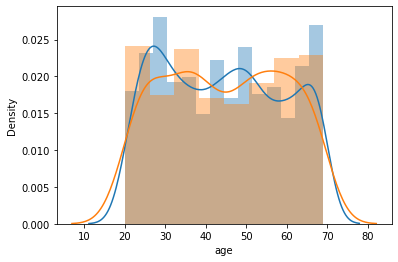

In [233]:

sns.distplot(logs_user_no_premium.age)
sns.distplot(logs_user_premium.age)

In [ ]:
# Задача 6
# Постройте график распределения числа успешных операций: 

# x – число успешных операций
# y – число клиентов, совершивших столько успешных операций



In [283]:
success_true = logs_user_data.groupby('client').agg({'success' : 'sum'}).sort_values('success')

In [284]:
success_true

,success
client,
78883,0
33906,0
33831,0
33805,0
76862,0
...,...
12179,41
36165,41
61473,41


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


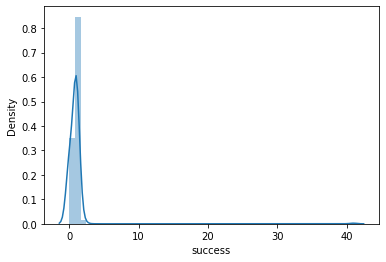

In [285]:
sns.distplot(success_true.success)

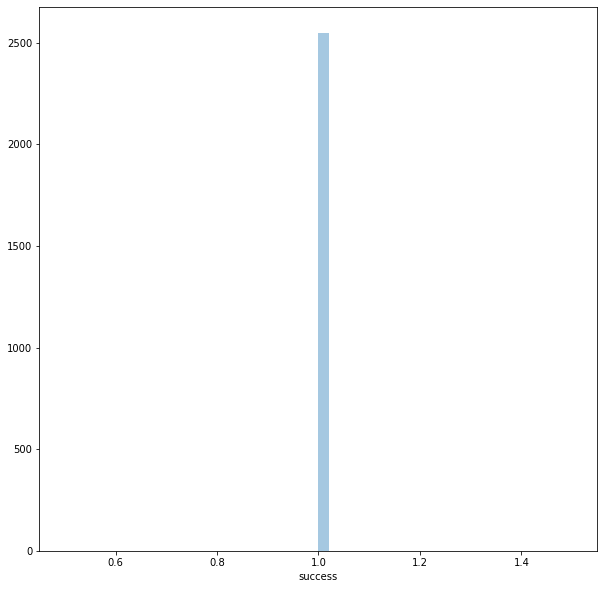

In [280]:
# "Это я просто баловался"
plt.figure(figsize = (10,10))
sns.distplot(logs_user_data.query('success').success, kde = False)

In [ ]:
# Задача 7
# Визуализируйте число успешных операций, сделанных на платформе computer, 
# в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 
# Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

# # Полезные ссылки:

# sns.countplot – документация к типу графика
# figsize – про размер графиков
# Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

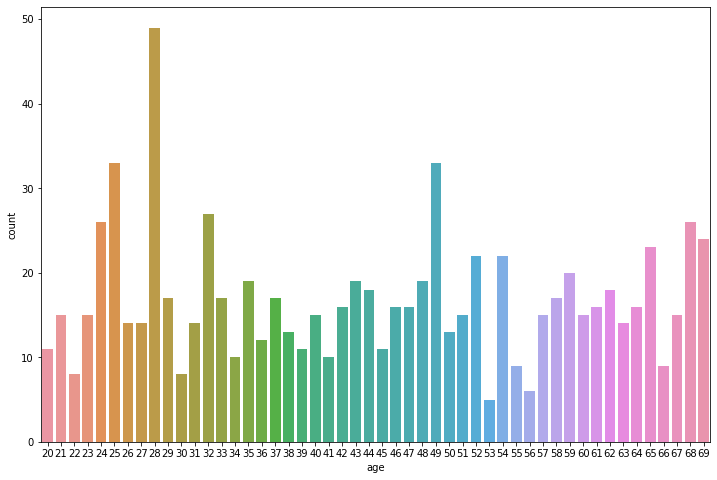

In [300]:
plt.figure(figsize = (12,8))
sns.countplot(data=logs_user_data.loc[(logs_user_data.success == True) & (logs_user_data.platform == "computer")], x = 'age')